In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv(r"C:\Users\Kshit\Desktop\Data analysis\stock prediction\tesla_stock_data_2000_2025.csv")


In [ ]:
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000


In [ ]:
data.columns

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

In [ ]:
data

,Date,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
2,2010-06-29,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000
5,2010-07-02,1.2799999713897705,1.5399999618530273,1.24733304977417,1.5333329439163208,77097000
...,...,...,...,...,...,...
3689,2025-02-25,302.79998779296875,328.8900146484375,297.25,327.0199890136719,134228800
3690,2025-02-26,290.79998779296875,309.0,288.0400085449219,303.7099914550781,100118300
3691,2025-02-27,281.95001220703125,297.2300109863281,280.8800048828125,291.1600036621094,101748200
3692,2025-02-28,292.9800109863281,293.8800048828125,273.6000061035156,279.5,115397200


In [ ]:
data = data.iloc[2:].reset_index()

In [ ]:
data

,index,Date,Close,High,Low,Open,Volume
0,3,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
1,4,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000
2,5,2010-07-02,1.2799999713897705,1.5399999618530273,1.24733304977417,1.5333329439163208,77097000
3,6,2010-07-06,1.0740000009536743,1.3333330154418945,1.0553330183029175,1.3333330154418945,103003500
4,7,2010-07-07,1.053333044052124,1.108667016029358,0.9986670017242432,1.0933330059051514,103825500
...,...,...,...,...,...,...,...
3686,3689,2025-02-25,302.79998779296875,328.8900146484375,297.25,327.0199890136719,134228800
3687,3690,2025-02-26,290.79998779296875,309.0,288.0400085449219,303.7099914550781,100118300
3688,3691,2025-02-27,281.95001220703125,297.2300109863281,280.8800048828125,291.1600036621094,101748200
3689,3692,2025-02-28,292.9800109863281,293.8800048828125,273.6000061035156,279.5,115397200


In [ ]:
data = data.drop(columns = ['index'])

In [ ]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
1,2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000
2,2010-07-02,1.2799999713897705,1.5399999618530273,1.24733304977417,1.5333329439163208,77097000
3,2010-07-06,1.0740000009536743,1.3333330154418945,1.0553330183029175,1.3333330154418945,103003500
4,2010-07-07,1.053333044052124,1.108667016029358,0.9986670017242432,1.0933330059051514,103825500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3691 entries, 0 to 3690
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3691 non-null   object
 1   Close   3691 non-null   object
 2   High    3691 non-null   object
 3   Low     3691 non-null   object
 4   Open    3691 non-null   object
 5   Volume  3691 non-null   object
dtypes: object(6)
memory usage: 173.1+ KB


In [ ]:
data['Date'] = pd.to_datetime(data["Date"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3691 entries, 0 to 3690
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3691 non-null   datetime64[ns]
 1   Close   3691 non-null   object        
 2   High    3691 non-null   object        
 3   Low     3691 non-null   object        
 4   Open    3691 non-null   object        
 5   Volume  3691 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 173.1+ KB


In [ ]:
data.set_index("Date", inplace=True)

In [ ]:
data

,Close,High,Low,Open,Volume
Date,,,,,
2010-06-30,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
2010-07-01,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000
2010-07-02,1.2799999713897705,1.5399999618530273,1.24733304977417,1.5333329439163208,77097000
2010-07-06,1.0740000009536743,1.3333330154418945,1.0553330183029175,1.3333330154418945,103003500
2010-07-07,1.053333044052124,1.108667016029358,0.9986670017242432,1.0933330059051514,103825500
...,...,...,...,...,...
2025-02-25,302.79998779296875,328.8900146484375,297.25,327.0199890136719,134228800
2025-02-26,290.79998779296875,309.0,288.0400085449219,303.7099914550781,100118300
2025-02-27,281.95001220703125,297.2300109863281,280.8800048828125,291.1600036621094,101748200


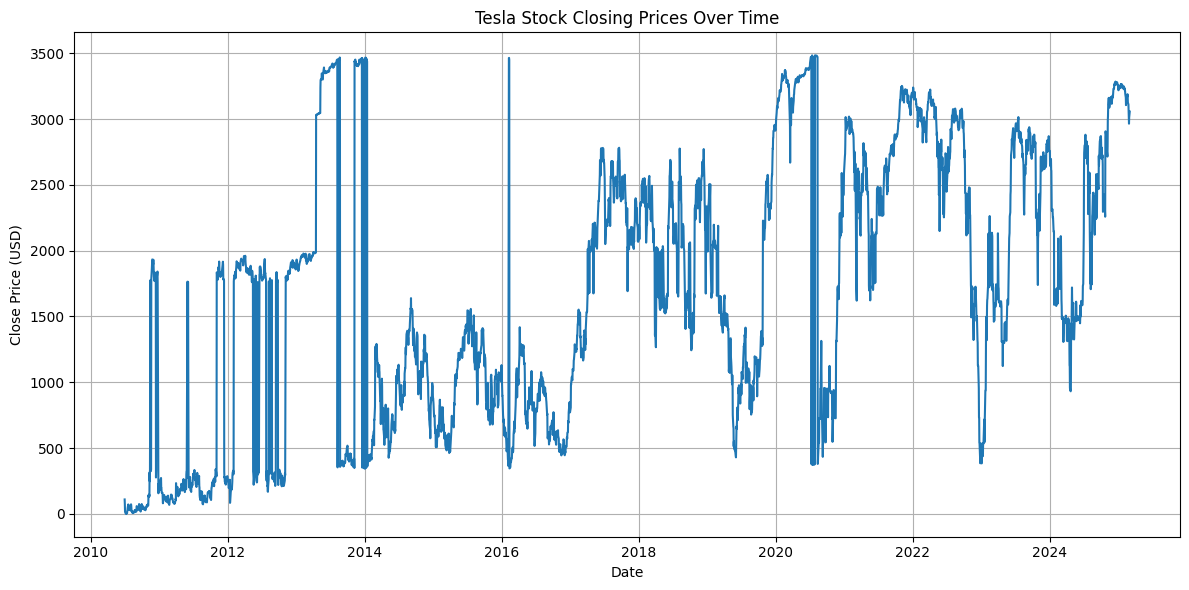

In [ ]:

plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Close", data=data)  # use unencoded data
plt.title("Tesla Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df=data[["Close"]].values

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [ ]:
def create_sequence(df,sequence_length):
    X=[]
    y=[]
    for i in range(sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [ ]:
sequence_length=10

In [ ]:
X,y=create_sequence(scaler_data,sequence_length)

In [ ]:
X=X.reshape((X.shape[0],X.shape[1],1))
print(X.shape,y.shape)

(3681, 10, 1) (3681,)


In [ ]:
model = Sequential()
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()

c:\Users\Kshit\Desktop\Data analysis\stock prediction\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X,y,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1938
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0130
Epoch 10/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144
Epoch 11/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119
Epoch 12/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100
Epoch 13/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124
Epoch 14/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118
Epoch 15/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
loss=model.evaluate(X,y)
print("Model loss:",loss)

116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0078  
Model loss: 0.005794452037662268


In [ ]:
predictions=model.predict(X)
predictions=scaler.inverse_transform(predictions)
print(predictions[:20])

116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 89.95804 ]
 [ 93.238594]
 [110.05277 ]
 [136.03134 ]
 [111.38053 ]
 [103.43745 ]
 [123.1319  ]
 [134.11334 ]
 [129.46773 ]
 [118.60241 ]
 [120.53755 ]
 [111.39507 ]
 [102.01787 ]
 [121.58239 ]
 [142.52151 ]
 [138.50656 ]
 [117.18481 ]
 [ 95.75702 ]
 [ 92.396286]
 [ 86.50331 ]]


In [ ]:
actual_values=scaler.inverse_transform(y.reshape(-1,1))

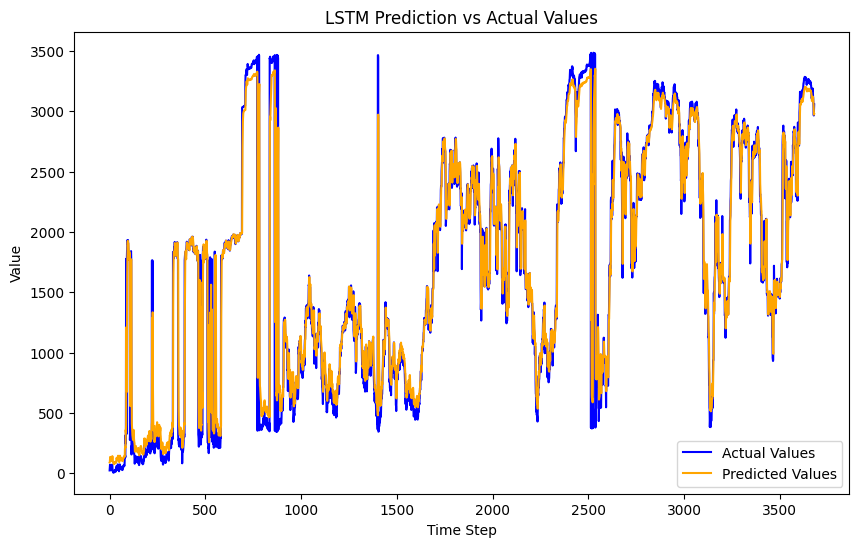

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values",color="blue")  
plt.plot(predictions, label="Predicted Values",color="orange") 
plt.legend()
plt.title('LSTM Prediction vs Actual Values')  
plt.xlabel('Time Step') 
plt.ylabel('Value')  
plt.show()